In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv('BITRE_Fatality-Table 1.csv')
data.head()


/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_3377/2355357808.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BITRE_Fatality-Table 1.csv')


Crash ID State  Month  Year Dayweek   Time Crash Type Bus Involvement  \
0  20245021    WA      4  2024  Friday  00:31     Single              No   
1  20245021    WA      4  2024  Friday  00:31     Single              No   
2  20245021    WA      4  2024  Friday  00:31     Single              No   
3  20245021    WA      4  2024  Friday  00:31     Single              No   
4  20243023   Qld      4  2024  Friday  01:00     Single              No   

  Heavy Rigid Truck Involvement Articulated Truck Involvement  ... Age  \
0                            No                            No  ...  19   
1                            No                            No  ...   9   
2                            No                            No  ...  21   
3                            No                            No  ...  45   
4                            No                            No  ...  24   

  National Remoteness Areas SA4 Name 2021  National LGA Name 2021  \
0                       NaN           NaN                     NaN   
1                       NaN           NaN                     NaN   
2                       NaN           NaN                     NaN   
3                       NaN           NaN                     NaN   
4  Outer Regional Australia        Cairns                  Cairns   

  National Road Type Christmas Period Easter Period Age Group Day of week  \
0                NaN               No            No  17_to_25     Weekday   
1                NaN               No            No   0_to_16     Weekday   
2                NaN               No            No  17_to_25     Weekday   
3                NaN               No            No  40_to_64     Weekday   
4         Local Road               No            No  17_to_25     Weekday   

  Time of day  
0       Night  
1       Night  
2       Night  
3       Night  
4       Night  

[5 rows x 23 columns]

In [4]:
data['Road User'].value_counts()

Driver                          25298
Passenger                       12790
Pedestrian                       8643
Motorcycle rider                 7279
Pedal cyclist                    1520
Motorcycle pillion passenger      381
Other/-9                          115
Name: Road User, dtype: int64

Optimized Code

00:44:16 - cmdstanpy - INFO - Chain [1] start processing
00:44:16 - cmdstanpy - INFO - Chain [1] done processing
00:44:17 - cmdstanpy - INFO - Chain [1] start processing
00:44:17 - cmdstanpy - INFO - Chain [1] done processing
00:44:17 - cmdstanpy - INFO - Chain [1] start processing
00:44:17 - cmdstanpy - INFO - Chain [1] done processing
00:44:17 - cmdstanpy - INFO - Chain [1] start processing
00:44:17 - cmdstanpy - INFO - Chain [1] done processing
00:44:17 - cmdstanpy - INFO - Chain [1] start processing
00:44:17 - cmdstanpy - INFO - Chain [1] done processing
00:44:17 - cmdstanpy - INFO - Chain [1] start processing
00:44:18 - cmdstanpy - INFO - Chain [1] done processing
00:44:18 - cmdstanpy - INFO - Chain [1] start processing
00:44:18 - cmdstanpy - INFO - Chain [1] done processing


Evaluation Metrics for the Test Period (2023) - Road User:
Driver - MAE: 7.92, MSE: 80.69, MAPE: 15.54%, R2: -0.42
Forecast vs Actual for first three months of 2024 for Driver:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  40.446664   22.459229   56.645178
421 2024-02-01  38.447444   20.931928   55.166207
422 2024-03-01  49.920106   33.624519   66.920027
        Date  Counts
0 2024-01-01      50
1 2024-02-01      42
2 2024-03-01      47

Forecast for Driver in 2030:
            ds       yhat  yhat_lower  yhat_upper
493 2030-01-31  35.800644   17.320347   51.895887
494 2030-02-28  46.717907   30.688216   63.266461
495 2030-03-31  29.662273   11.710789   46.308678
496 2030-04-30  51.544899   33.989716   68.002258
497 2030-05-31  47.905521   30.275593   65.526534
498 2030-06-30  34.791974   18.193608   52.448203
499 2030-07-31  40.439979   23.146695   56.491077
500 2030-08-31  45.457257   27.824333   62.560961
501 2030-09-30  42.796939   25.684744   58.943420
502 2030-

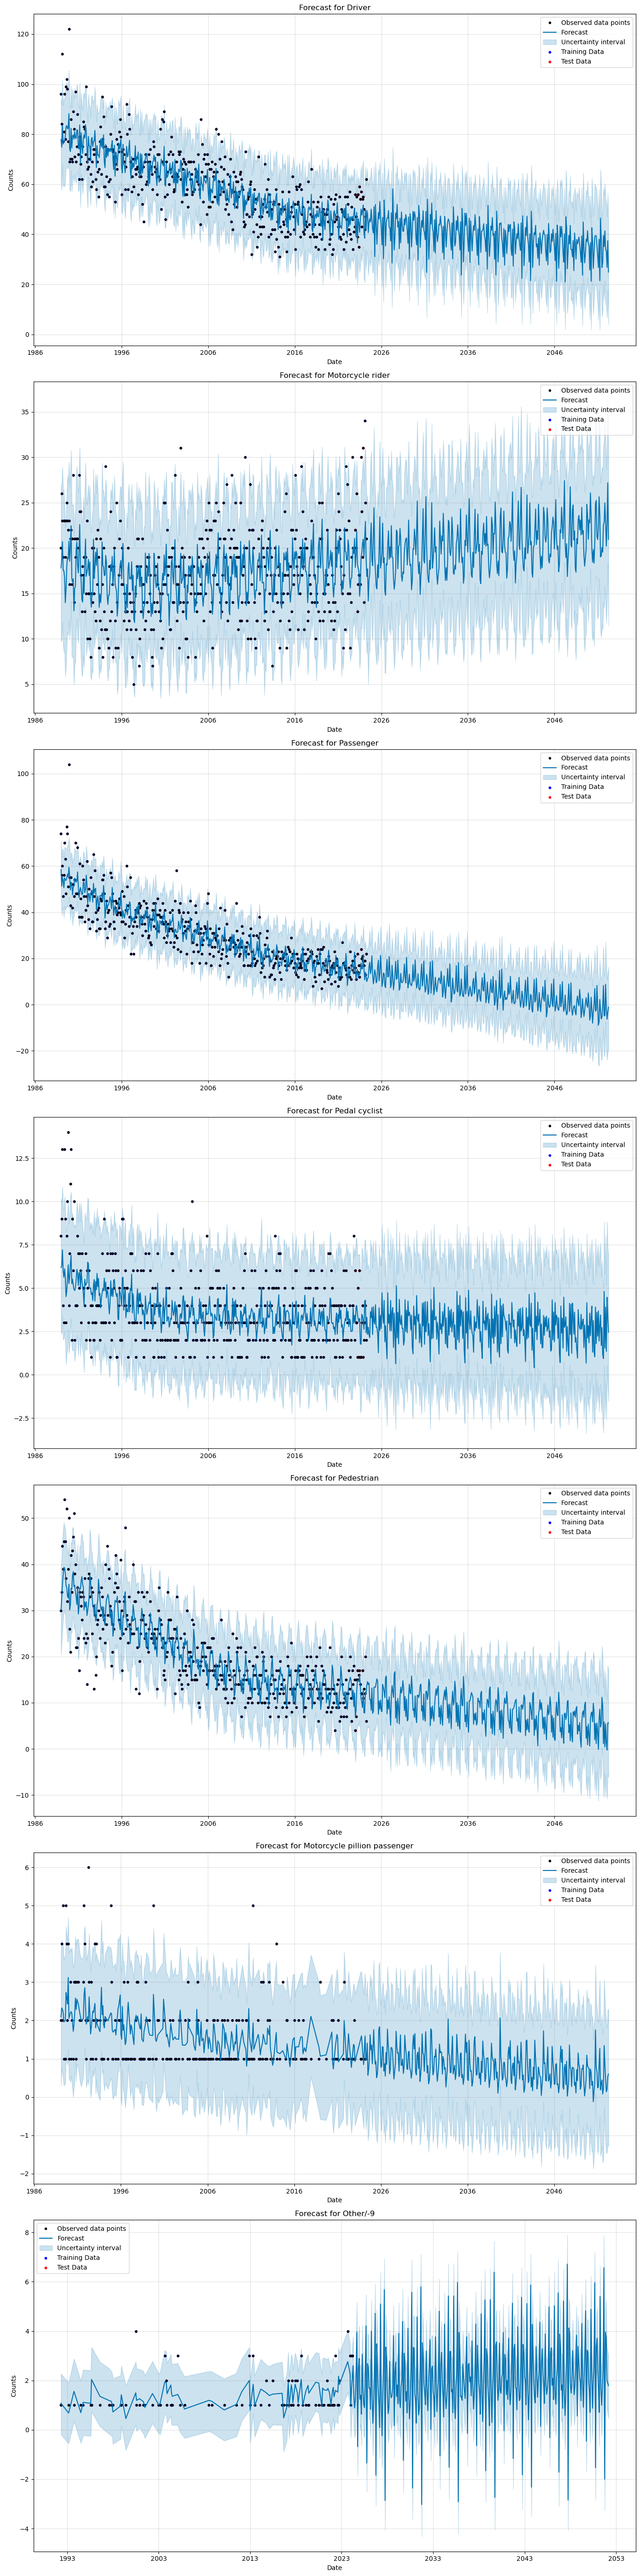

Dickey-Fuller Test Results:

Road User: Driver
ADF Statistic: -2.2533155542479
p-value: 0.1874667307262447
Critical Value 1%: -3.446479704252724
Critical Value 5%: -2.8686500930967354
Critical Value 10%: -2.5705574627547096

Road User: Motorcycle rider
ADF Statistic: -2.5363270514059635
p-value: 0.10688384703310871
Critical Value 1%: -3.4463612216221775
Critical Value 5%: -2.8685980017932917
Critical Value 10%: -2.5705296947685605

Road User: Passenger
ADF Statistic: -3.4416767836651365
p-value: 0.009617552968270977
Critical Value 1%: -3.4464400156784927
Critical Value 5%: -2.868632644097719
Critical Value 10%: -2.5705481612974577

Road User: Pedal cyclist
ADF Statistic: -4.372581165898739
p-value: 0.0003318136596567217
Critical Value 1%: -3.447099431978147
Critical Value 5%: -2.8689225261604263
Critical Value 10%: -2.57070269105012

Road User: Pedestrian
ADF Statistic: -2.9810564089842733
p-value: 0.036701765440848876
Critical Value 1%: -3.4463612216221775
Critical Value 5%: -2.868598

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (abs((y_true - y_pred) / y_true)).mean() * 100

# Convert the 'Year' and 'Month' columns to a single datetime column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Filter data up to 2022 for training and 2023 for testing
train_data = data[data['Year'] <= 2022]
test_data = data[data['Year'] == 2023]

# Filter data for 'Male' and 'Female' only
train_data = train_data[train_data['Road User'].isin(['Driver', 'Passenger','Pedestrian','Motorcycle rider','Pedal cyclist'])]
test_data = test_data[test_data['Road User'].isin(['Driver', 'Passenger','Pedestrian','Motorcycle rider','Pedal cyclist'])]

# Aggregate the number of occurrences of each feature per month for training data
def aggregate_counts(data, feature):
    return data.groupby(['Date', feature]).size().reset_index(name='Counts')

# Prepare the data for Prophet and forecast
def forecast_feature(data, feature):
    counts = aggregate_counts(data, feature)
    
    models = {}
    forecasts = {}
    for value in counts[feature].unique():
        value_data = counts[counts[feature] == value]
        value_data = value_data[['Date', 'Counts']].rename(columns={'Date': 'ds', 'Counts': 'y'})
        
        # Skip if there are less than 2 non-NaN rows
        if value_data.shape[0] < 2:
            print(f"Skipping {value} due to insufficient data.")
            continue

        # Initialize and fit the Prophet model
        model = Prophet(interval_width=0.95,
                        yearly_seasonality=True,
                        daily_seasonality=True,
                        weekly_seasonality=True,
                        seasonality_mode='additive')
        model.fit(value_data)
        models[value] = model

        # Create a dataframe for future dates including 2023 (test period) and beyond
        future_dates = model.make_future_dataframe(periods=(2050 - 2022) * 12, freq='M')

        # Predict future values
        forecast = model.predict(future_dates)
        forecasts[value] = forecast
    
    return models, forecasts

# Forecast for a specific feature
feature = 'Road User'  # Change this to the desired feature
time_of_day_models, forecasts = forecast_feature(data, feature)

# Calculate and print evaluation metrics for the test period (2023)
print(f"Evaluation Metrics for the Test Period (2023) - {feature}:")
for value, forecast in forecasts.items():
    # Filter forecast for 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]

    # Filter actual counts for 2023
    actual_counts_2023 = test_data[test_data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    actual_counts_2023 = actual_counts_2023.rename(columns={'Date': 'ds', 'Counts': 'y'})

    # Ensure there are actual counts for 2023
    if actual_counts_2023.shape[0] == 0:
        print(f"No actual data for {value} in 2023.")
        continue

    # Ensure the forecast and actual data are aligned
    forecast_2023 = forecast_2023.set_index('ds').loc[actual_counts_2023['ds']].reset_index()

    # Calculate evaluation metrics
    mae = mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mse = mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mape = mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat'])
    r2 = r2_score(actual_counts_2023['y'], forecast_2023['yhat'])

    print(f"{value} - MAE: {mae:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}%, R2: {r2:.2f}")
    print(f"Forecast vs Actual for first three months of 2024 for {value}:")
    future_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(future_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Filter actual counts for first three months of 2024
    actual_counts_2024 = data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2024-03-31') & (data[feature] == value)]
    actual_counts_2024 = actual_counts_2024.groupby('Date').size().reset_index(name='Counts')
    print(actual_counts_2024)
    print()

    # Print forecast for 2030, 2040, and 2050
    future_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]
    future_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]
    future_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]
    
    print(f"Forecast for {value} in 2030:")
    print(future_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2040:")
    print(future_2040[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2050:")
    print(future_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()

# Plot the forecasts
fig, axes = plt.subplots(nrows=len(forecasts), ncols=1, figsize=(14, 8*len(forecasts)))

for ax, (value, forecast) in zip(axes, forecasts.items()):
    model = time_of_day_models[value]
    model.plot(forecast, ax=ax, xlabel='Date', ylabel='Counts')
    
    # Plot training data
    train_time_data = data[data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    ax.scatter(train_time_data['Date'], train_time_data['Counts'], color='blue', s=10, label='Training Data')
    
    # Plot test data
    test_time_data = test_data[test_data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    ax.scatter(test_time_data['Date'], test_time_data['Counts'], color='red', s=10, label='Test Data')
    
    ax.legend()
    ax.set_title(f'Forecast for {value}')

# Show the plot
plt.tight_layout()
plt.show()

# Save the plot
fig.savefig(f'{feature}_forecast.png')

# Perform Dickey-Fuller Test
print("Dickey-Fuller Test Results:")
for value, forecast in forecasts.items():
    time_data = data[data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    adf_result = adfuller(time_data['Counts'])
    print(f"\n{feature}: {value}")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    for key, value in adf_result[4].items():
        print(f"Critical Value {key}: {value}")

# Print actual counts for each year from 2013 to 2023
print("\nActual Counts per Year (2013-2023):")
for year in range(2013, 2024):
    year_counts = data[(data['Year'] == year) & (data['Gender'].isin(['Male', 'Female']))].groupby('Year').size().reset_index(name='Counts')
    print(f"Year {year}: {year_counts['Counts'].sum()} counts")


In [11]:


# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Road User'] = data['Road User'].astype(str)

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# تجمیع داده‌ها بر اساس تاریخ و ایالت
fatalities_by_state_month = data.groupby(['Date', 'Road User']).size().reset_index(name='Fatalities')

# استخراج مقادیر واقعی برای سه ماه اول 2024
actual_2024_q1 = fatalities_by_state_month[(fatalities_by_state_month['Date'] >= '2024-01-01') & (fatalities_by_state_month['Date'] <= '2024-12-31')]
actual_2024_q1 = actual_2024_q1.pivot(index='Date', columns='Road User', values='Fatalities').fillna(0)
print('Actual fatalities for Q1 2024:')
print(actual_2024_q1)


Actual fatalities for Q1 2024:
Road User   Driver  Motorcycle pillion passenger  Motorcycle rider  Other/-9  \
Date                                                                           
2024-01-01    50.0                           1.0              14.0       1.0   
2024-02-01    42.0                           0.0              34.0       3.0   
2024-03-01    47.0                           1.0              25.0       3.0   
2024-04-01    62.0                           1.0              21.0       0.0   

Road User   Passenger  Pedal cyclist  Pedestrian  
Date                                              
2024-01-01       17.0            2.0        13.0  
2024-02-01       19.0            3.0        12.0  
2024-03-01       13.0            4.0        20.0  
2024-04-01       22.0            2.0         6.0  


16:12:05 - cmdstanpy - INFO - Chain [1] start processing
16:12:05 - cmdstanpy - INFO - Chain [1] done processing


Predictions for Driver - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  41.762580   25.047420   59.670542
421 2024-02-01  38.108271   20.467249   54.674976
422 2024-03-01  47.058228   30.230760   62.806543


<Figure size 1000x600 with 0 Axes>

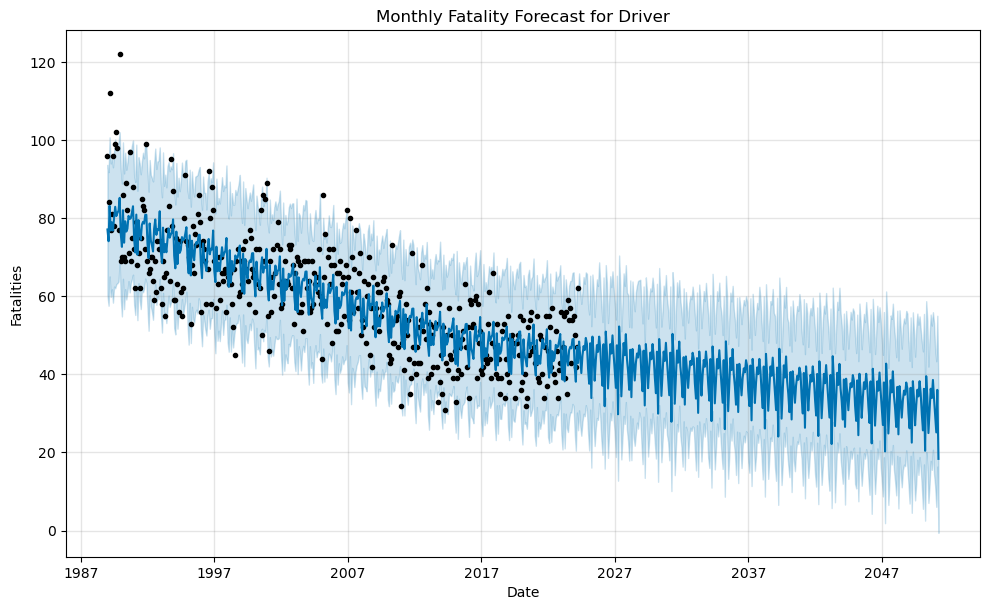

16:12:05 - cmdstanpy - INFO - Chain [1] start processing
16:12:05 - cmdstanpy - INFO - Chain [1] done processing


Predictions for Motorcycle rider - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  18.852624   10.771617   27.097649
421 2024-02-01  19.806613   11.397654   28.819951
422 2024-03-01  21.427483   13.076809   29.685880


<Figure size 1000x600 with 0 Axes>

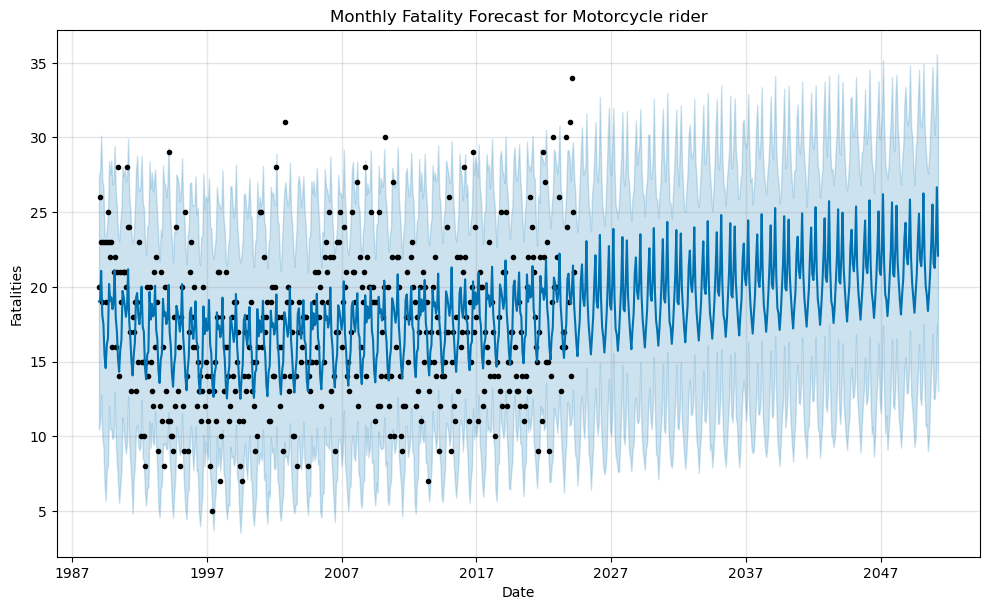

16:12:06 - cmdstanpy - INFO - Chain [1] start processing
16:12:06 - cmdstanpy - INFO - Chain [1] done processing


Predictions for Passenger - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  16.065467    3.837828   29.107721
421 2024-02-01   9.285028   -4.279044   22.082203
422 2024-03-01  13.636715    0.656849   26.629737


<Figure size 1000x600 with 0 Axes>

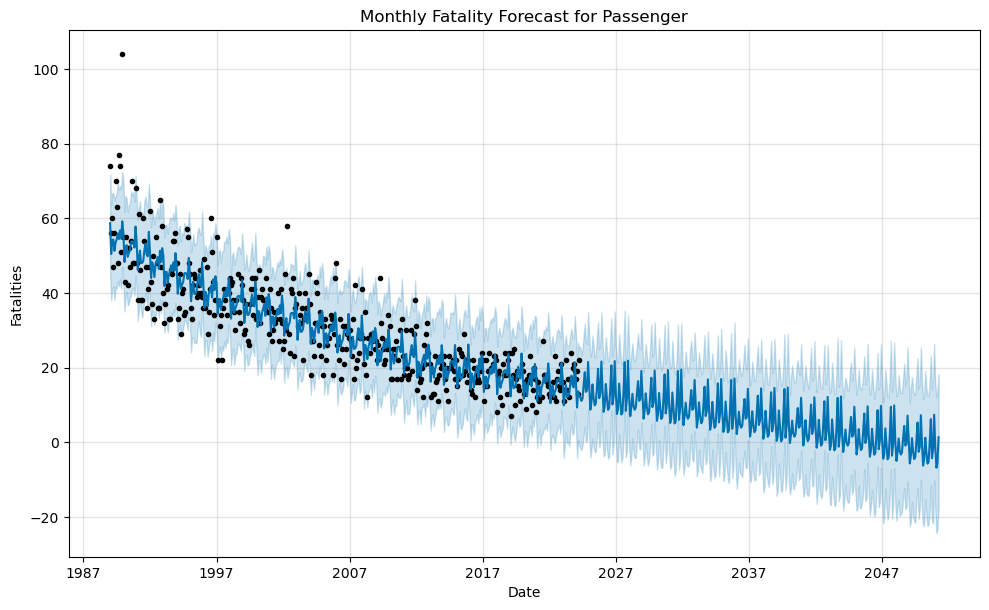

16:12:07 - cmdstanpy - INFO - Chain [1] start processing
16:12:07 - cmdstanpy - INFO - Chain [1] done processing


Predictions for Pedal cyclist - Q1 2024:
            ds      yhat  yhat_lower  yhat_upper
401 2024-01-01  3.002409   -0.644762    7.088429
402 2024-02-01  3.991153    0.044884    7.815702
403 2024-03-01  4.474539    0.800708    8.308241


<Figure size 1000x600 with 0 Axes>

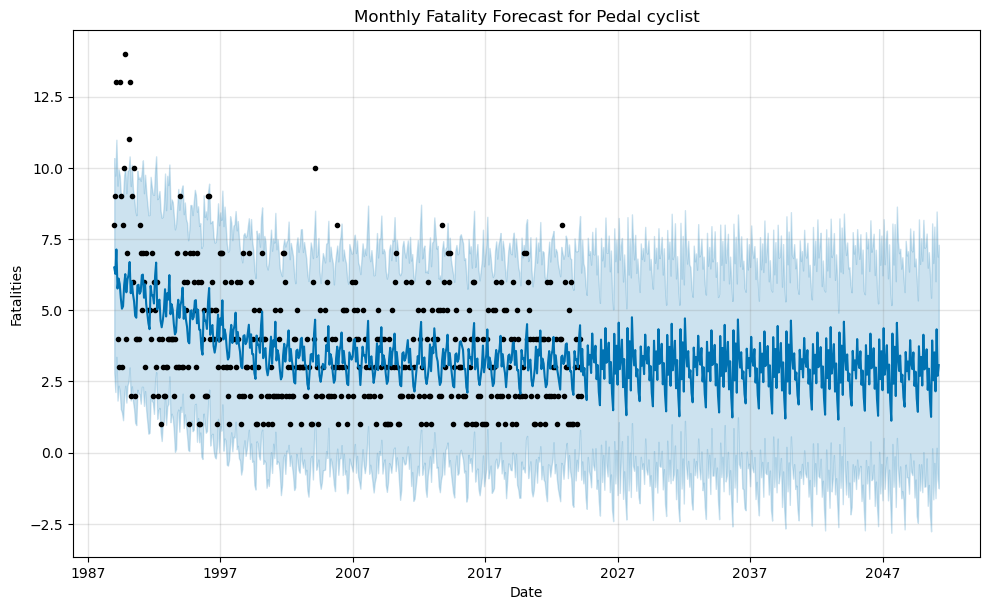

16:12:07 - cmdstanpy - INFO - Chain [1] start processing
16:12:07 - cmdstanpy - INFO - Chain [1] done processing


Predictions for Pedestrian - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01   8.153361   -1.437171   18.410081
421 2024-02-01   7.878288   -2.708125   17.886709
422 2024-03-01  11.475082    1.635666   20.720993


<Figure size 1000x600 with 0 Axes>

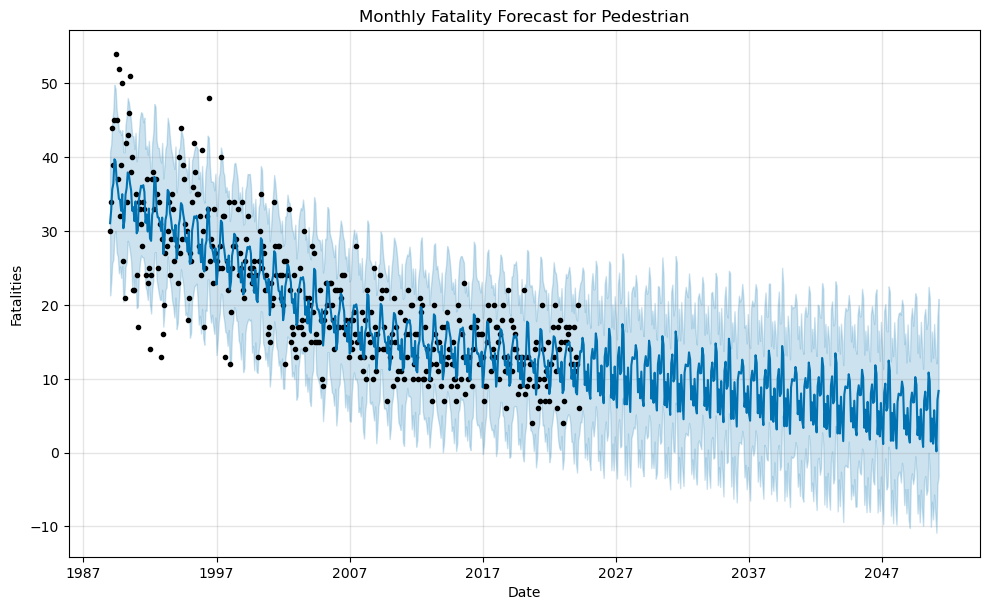

16:12:08 - cmdstanpy - INFO - Chain [1] start processing
16:12:08 - cmdstanpy - INFO - Chain [1] done processing


Predictions for Motorcycle pillion passenger - Q1 2024:
            ds      yhat  yhat_lower  yhat_upper
224 2024-01-01  0.984701   -0.649406    2.713934
225 2024-03-01  1.171150   -0.517223    2.947214


<Figure size 1000x600 with 0 Axes>

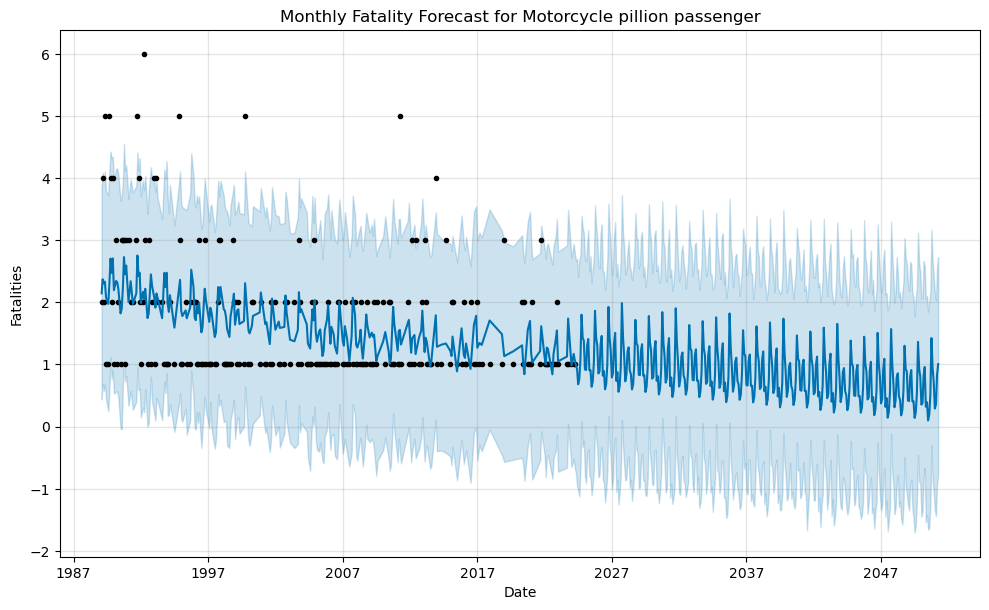

16:12:08 - cmdstanpy - INFO - Chain [1] start processing
16:12:08 - cmdstanpy - INFO - Chain [1] done processing


Predictions for Other/-9 - Q1 2024:
           ds      yhat  yhat_lower  yhat_upper
79 2024-01-01  1.255014   -0.142720    2.638776
80 2024-02-01  1.714572    0.407958    3.135179
81 2024-03-01  2.017378    0.725589    3.347751
82 2024-03-31  2.151367    0.806899    3.395188


FileNotFoundError: [Errno 2] No such file or directory: '/Users/amin/Desktop/data science/time Series/bitre_fatalities_apr_2024_categorized/forecast_monthly_Other/-9.png'

<Figure size 1000x600 with 0 Axes>

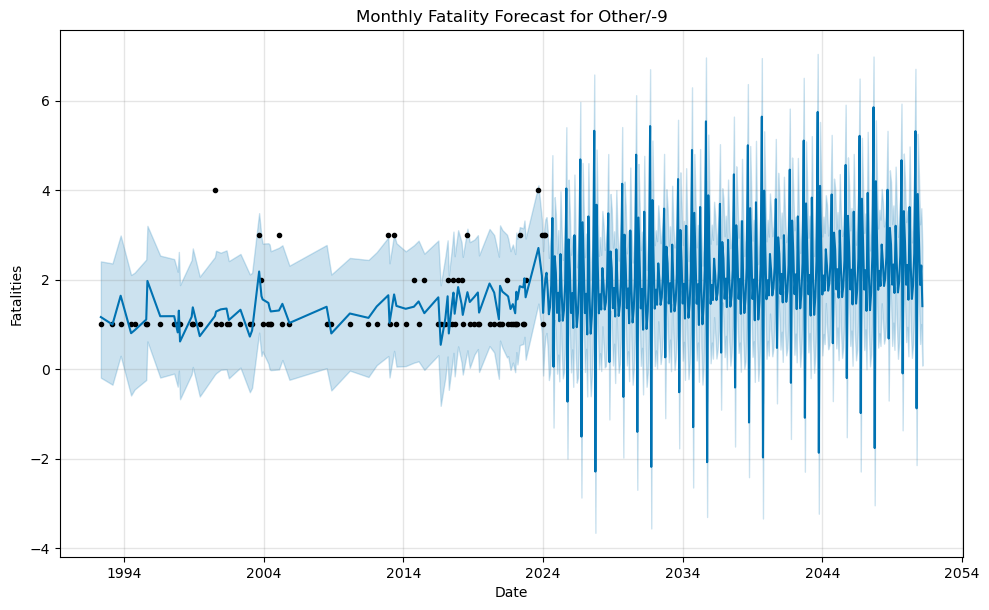

In [12]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# بارگذاری فایل CSV

# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Road User'] = data['Road User'].astype(str)

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# تجمیع داده‌ها بر اساس تاریخ و ایالت
fatalities_by_state_month = data.groupby(['Date', 'Road User']).size().reset_index(name='Fatalities')

# آماده‌سازی یک دیکشنری برای ذخیره پیش‌بینی‌ها
forecasts = {}

# لیست ایالت‌ها در دیتاست
Road_User = fatalities_by_state_month['Road User'].unique()

# افق پیش‌بینی (ماه‌ها)
latest_date = fatalities_by_state_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

for Road_User in Road_User:
    # آماده‌سازی داده‌ها برای Prophet
    state_data = fatalities_by_state_month[fatalities_by_state_month['Road User'] == Road_User][['Date', 'Fatalities']]
    state_data.columns = ['ds', 'y']

    # ایجاد و آموزش مدل Prophet
    model = Prophet(
        interval_width=0.95,
             #yearly_seasonality=True,weekly_seasonality=False,daily_seasonality=False,changepoint_prior_scale=0.05,seasonality_prior_scale=10.0
                  yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False  )
    model.fit(state_data)

    # ایجاد یک DataFrame برای نگهداری تاریخ‌های آینده
    future = model.make_future_dataframe(periods=324, freq='M')

    # انجام پیش‌بینی
    forecast = model.predict(future)

    # ذخیره پیش‌بینی در دیکشنری
    forecasts[state] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # استخراج پیش‌بینی‌های سه ماه اول 2024
    forecast_2024_q1 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(f'Predictions for {Road_User} - Q1 2024:')
    print(forecast_2024_q1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # رسم نمودار پیش‌بینی
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Monthly Fatality Forecast for {Road_User}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    plt.savefig(f'forecast_monthly_{Road_User}.png')  # ذخیره نمودار به عنوان فایل تصویر
    plt.show()


/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_4922/15955664.py:6: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BITRE_Fatality-Table 1.csv')
02:25:34 - cmdstanpy - INFO - Chain [1] start processing
02:25:34 - cmdstanpy - INFO - Chain [1] done processing
02:25:34 - cmdstanpy - INFO - Chain [1] start processing
02:25:34 - cmdstanpy - INFO - Chain [1] done processing
02:25:34 - cmdstanpy - INFO - Chain [1] start processing
02:25:34 - cmdstanpy - INFO - Chain [1] done processing
02:25:34 - cmdstanpy - INFO - Chain [1] start processing
02:25:35 - cmdstanpy - INFO - Chain [1] done processing
02:25:35 - cmdstanpy - INFO - Chain [1] start processing
02:25:35 - cmdstanpy - INFO - Chain [1] done processing
02:25:35 - cmdstanpy - INFO - Chain [1] start processing
02:25:35 - cmdstanpy - INFO - Chain [1] done processing
02:25:35 - cmdstanpy - INFO - Chain [1] start processing
02:25:35 - cmdstanpy -

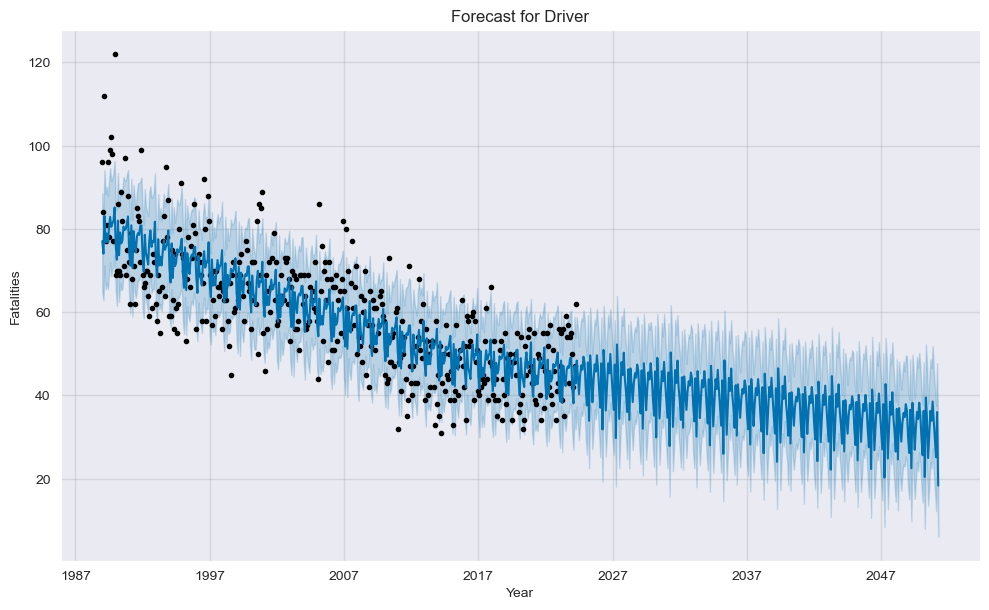

Driver does not reach zero fatalities by 2050


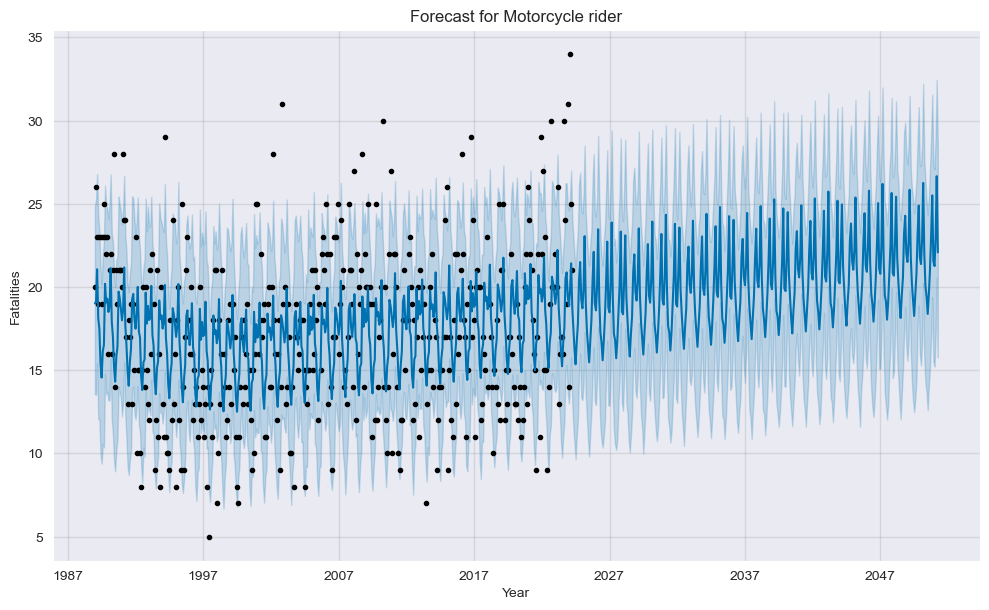

Motorcycle rider does not reach zero fatalities by 2050


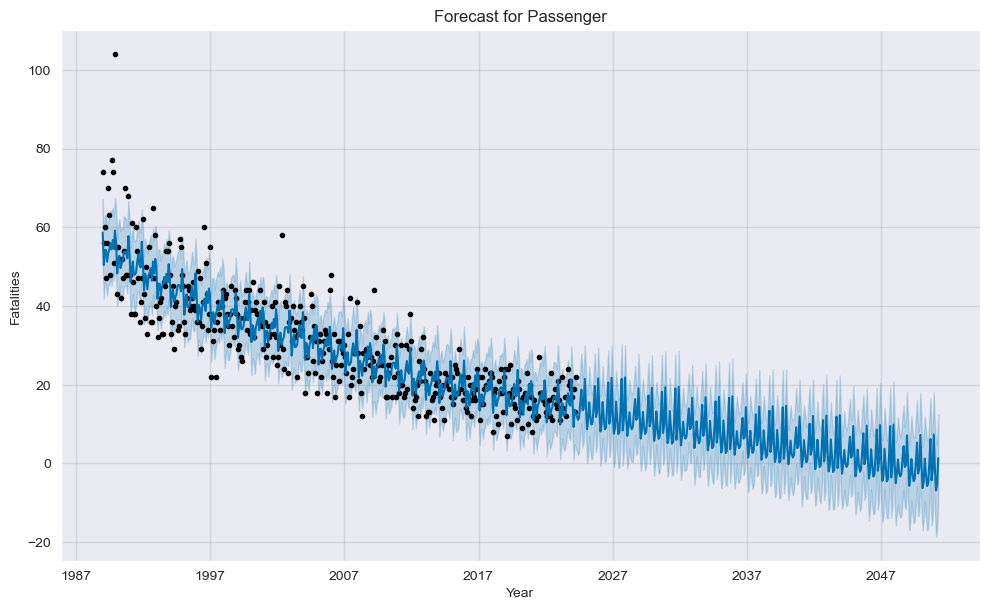

The forecasted date when fatalities might reach zero for Passenger is: 2040-01-31


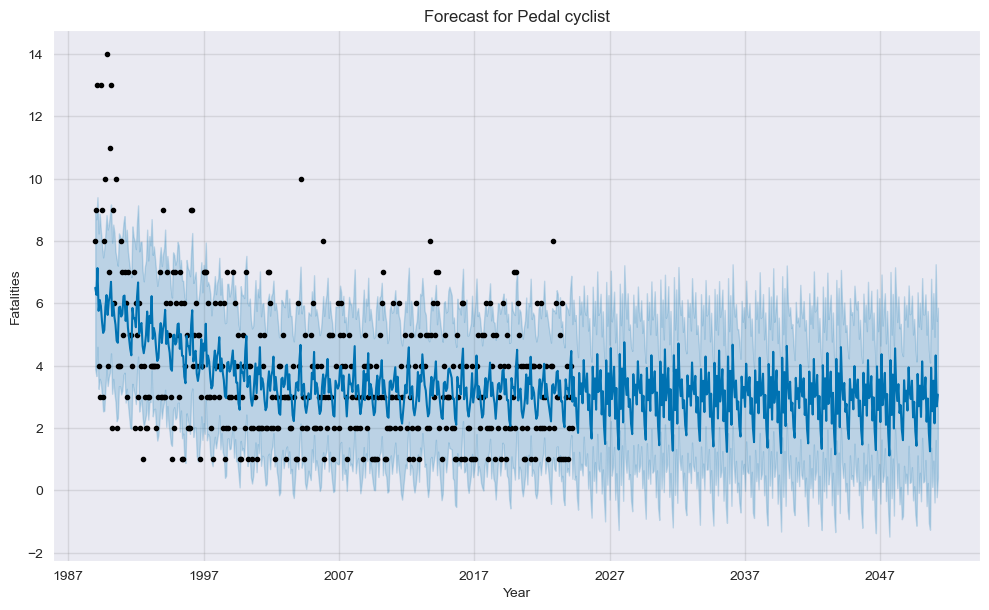

Pedal cyclist does not reach zero fatalities by 2050


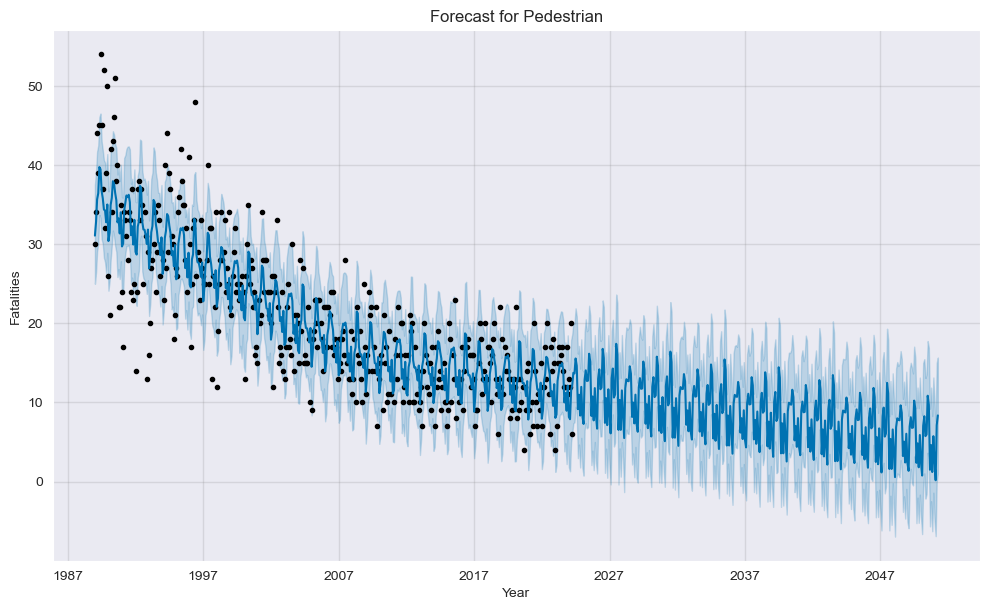

Pedestrian does not reach zero fatalities by 2050


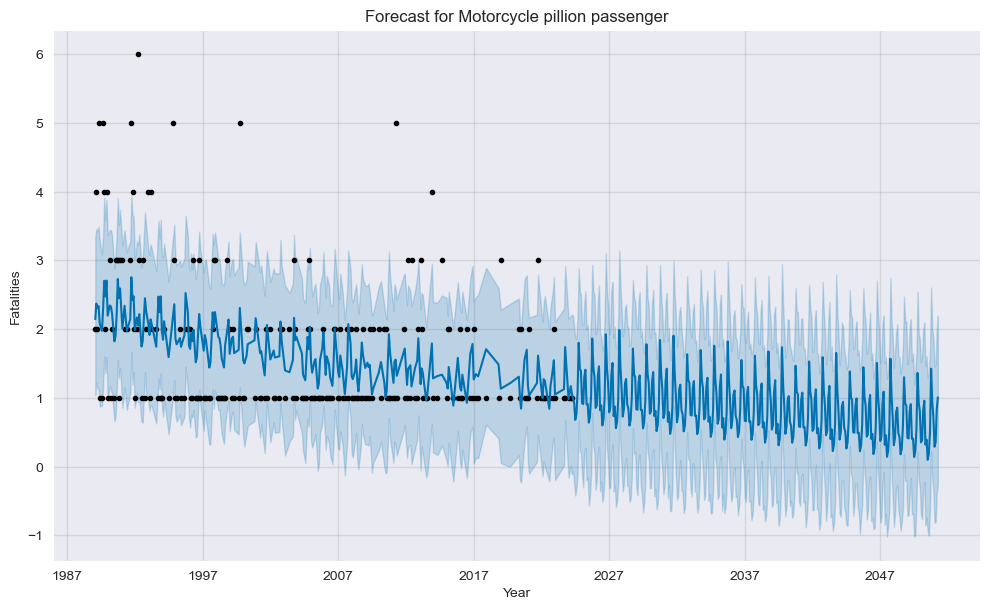

Motorcycle pillion passenger does not reach zero fatalities by 2050


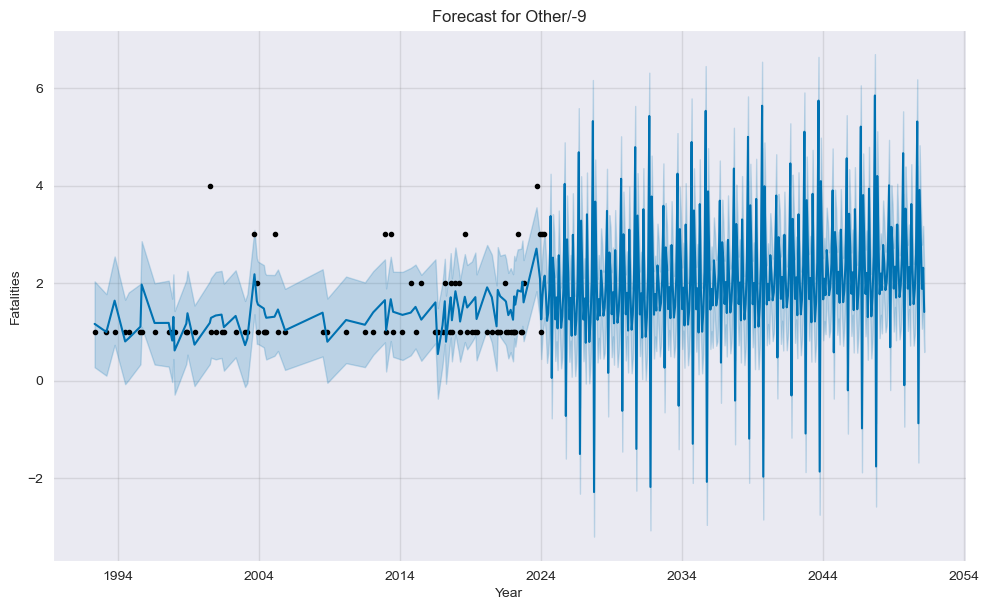

The forecasted date when fatalities might reach zero for Other/-9 is: 2025-09-30


In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# بارگذاری داده‌ها
data = pd.read_csv('BITRE_Fatality-Table 1.csv')

# حذف Unspecified
data = data[data['Road User'] != 'Unspecified']

# تبدیل سال و ماه به یک ستون تاریخ
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1))

# گروه‌بندی بر اساس تاریخ و نوع کاربر جاده‌ای و محاسبه تعداد تلفات
monthly_fatalities = data.groupby(['Date', 'Road User']).size().reset_index(name='Fatalities')

# ایجاد دیکشنری برای ذخیره مدل‌ها و پیش‌بینی‌ها
models = {}
forecasts = {}
road_users = monthly_fatalities['Road User'].unique()

for user in road_users:
    # آماده‌سازی داده‌ها برای Prophet
    df_user = monthly_fatalities[monthly_fatalities['Road User'] == user][['Date', 'Fatalities']].rename(columns={'Date': 'ds', 'Fatalities': 'y'})
    
    # ایجاد و آموزش مدل
    model = Prophet()
    model.fit(df_user)
    
    # ایجاد یک دیتافریم برای تاریخ‌های آینده
    future = model.make_future_dataframe(periods=324, freq='M')  # افزایش دیتافریم تا سال 2050 (324 ماه از 2024)
    
    # انجام پیش‌بینی
    forecast = model.predict(future)
    
    # ذخیره مدل و پیش‌بینی
    models[user] = model
    forecasts[user] = forecast

# نمایش نتایج پیش‌بینی برای هر نوع کاربر جاده‌ای
for user in road_users:
    forecast = forecasts[user]
    model = models[user]
    
    # رسم نمودار پیش‌بینی
    model.plot(forecast)
    plt.title(f'Forecast for {user}')
    plt.xlabel('Year')
    plt.ylabel('Fatalities')
    plt.show()
    
    # پیدا کردن اولین تاریخ که پیش‌بینی تلفات صفر یا نزدیک به صفر است
    zero_fatality_date = forecast[forecast['yhat'] <= 0].head(1)['ds']
    if not zero_fatality_date.empty:
        print(f'The forecasted date when fatalities might reach zero for {user} is: {zero_fatality_date.iloc[0].date()}')
    else:
        print(f'{user} does not reach zero fatalities by 2050')


22:04:46 - cmdstanpy - INFO - Chain [1] start processing
22:04:46 - cmdstanpy - INFO - Chain [1] done processing
22:04:46 - cmdstanpy - INFO - Chain [1] start processing
22:04:46 - cmdstanpy - INFO - Chain [1] done processing
22:04:46 - cmdstanpy - INFO - Chain [1] start processing
22:04:46 - cmdstanpy - INFO - Chain [1] done processing
22:04:46 - cmdstanpy - INFO - Chain [1] start processing
22:04:46 - cmdstanpy - INFO - Chain [1] done processing
22:04:47 - cmdstanpy - INFO - Chain [1] start processing
22:04:47 - cmdstanpy - INFO - Chain [1] done processing
22:04:47 - cmdstanpy - INFO - Chain [1] start processing
22:04:47 - cmdstanpy - INFO - Chain [1] done processing
22:04:47 - cmdstanpy - INFO - Chain [1] start processing
22:04:47 - cmdstanpy - INFO - Chain [1] done processing


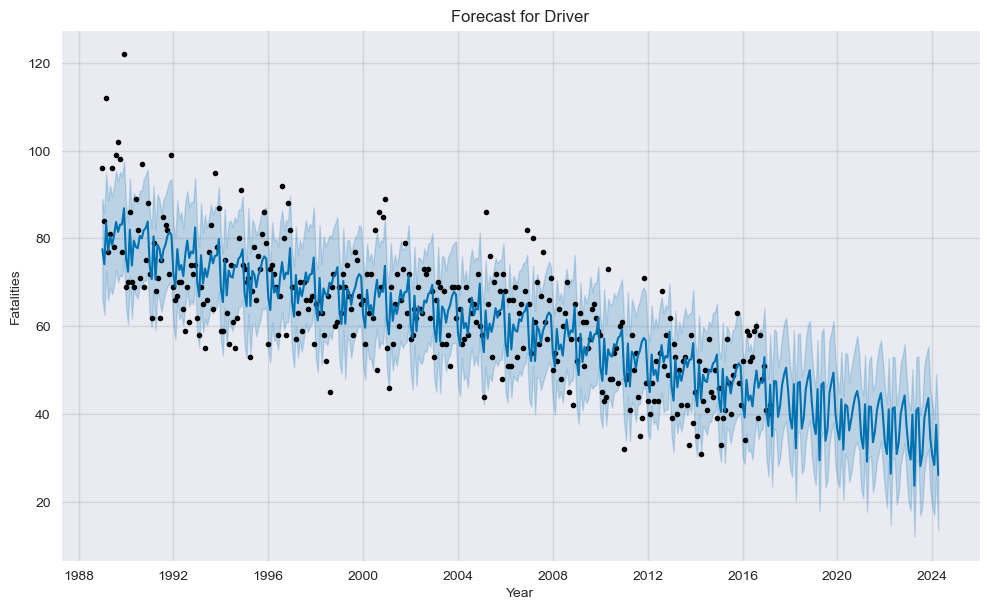

Driver does not reach zero fatalities by 2050
RMSE for Driver: 12.225585293914325


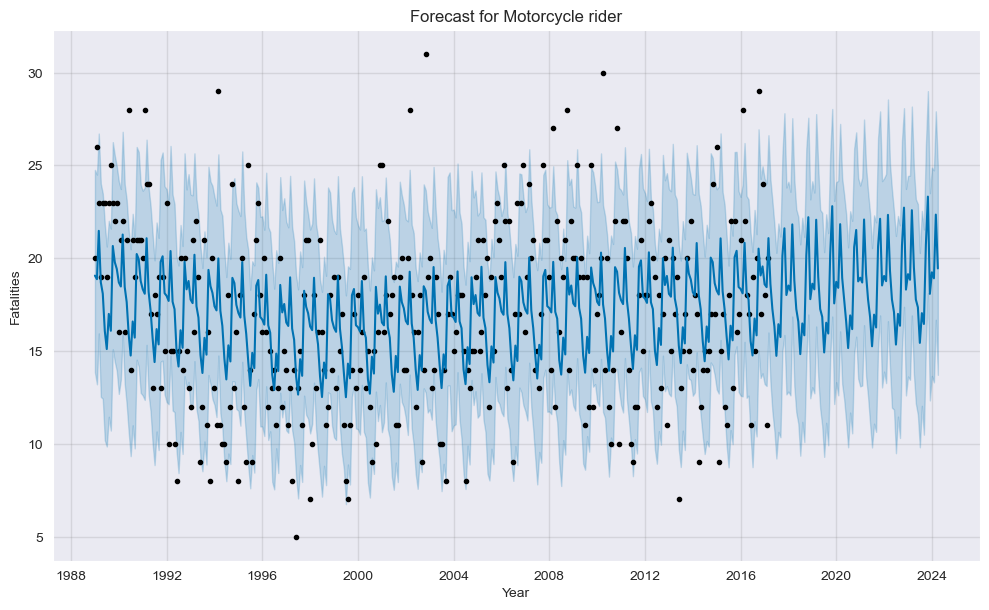

Motorcycle rider does not reach zero fatalities by 2050
RMSE for Motorcycle rider: 5.084479256804424


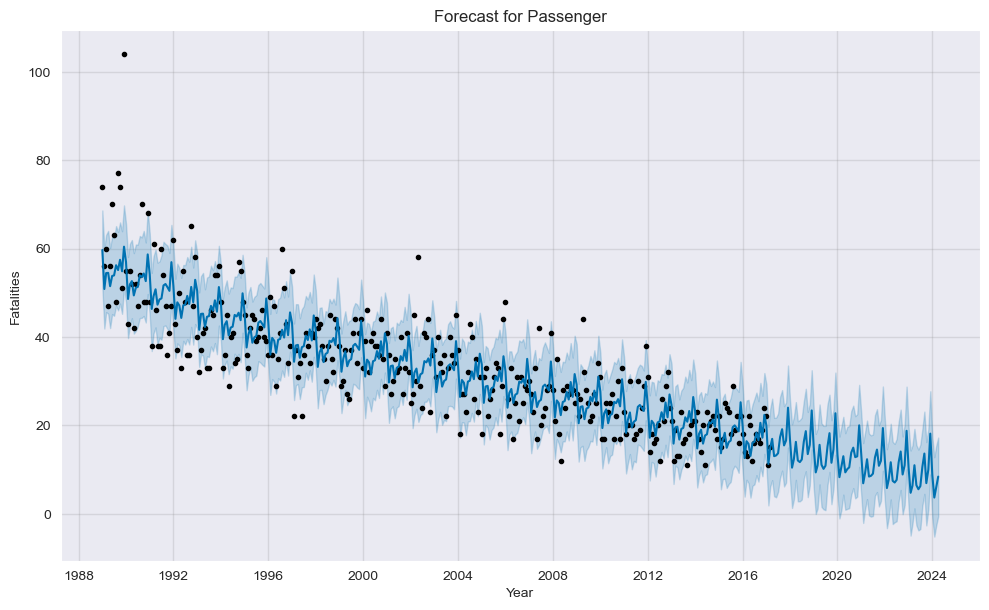

Passenger does not reach zero fatalities by 2050
RMSE for Passenger: 6.787282361225534


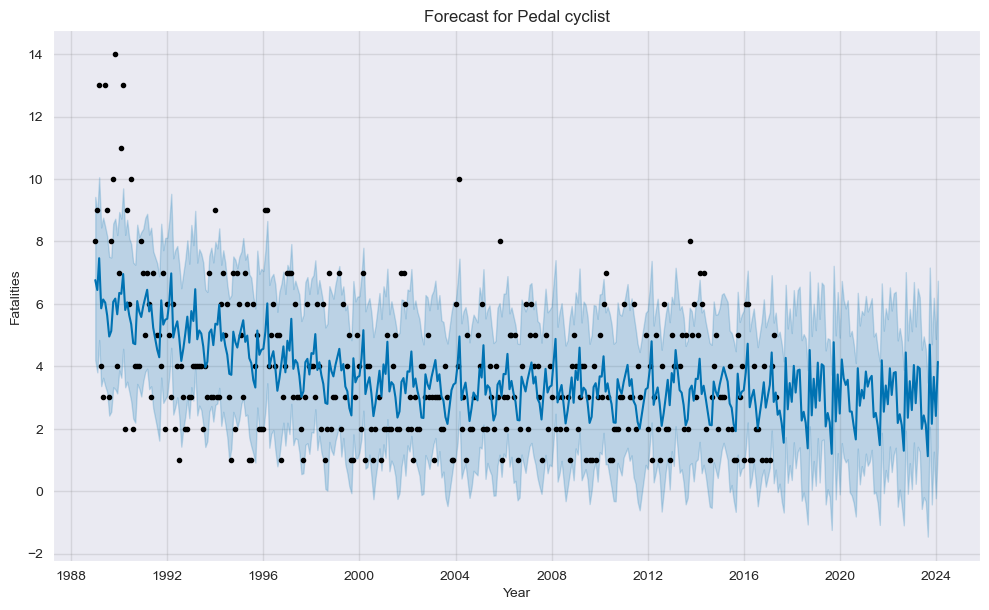

Pedal cyclist does not reach zero fatalities by 2050
RMSE for Pedal cyclist: 2.1033411084345484


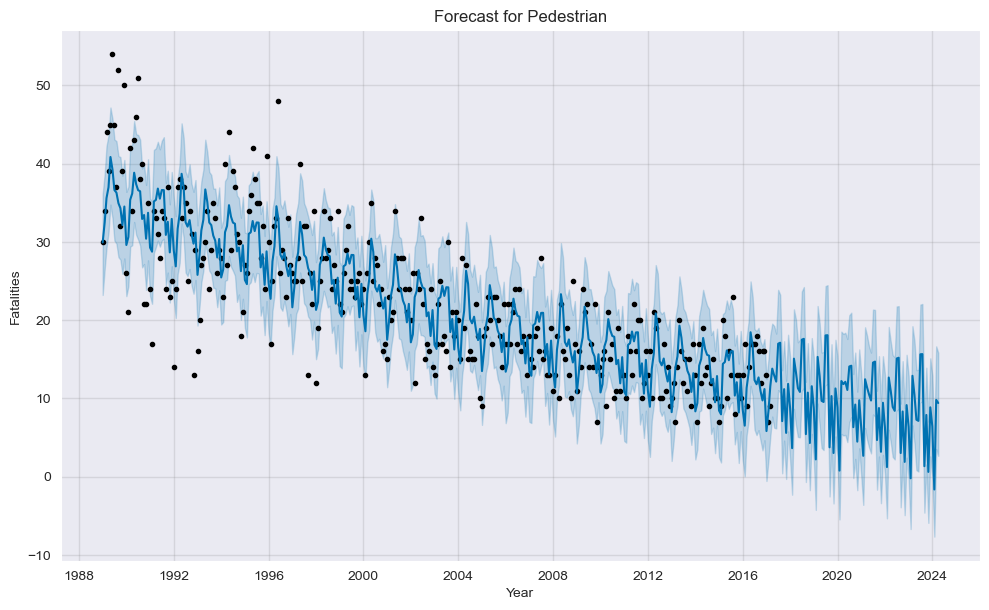

The forecasted date when fatalities might reach zero for Pedestrian is: 2023-01-31
RMSE for Pedestrian: 7.12168627240623


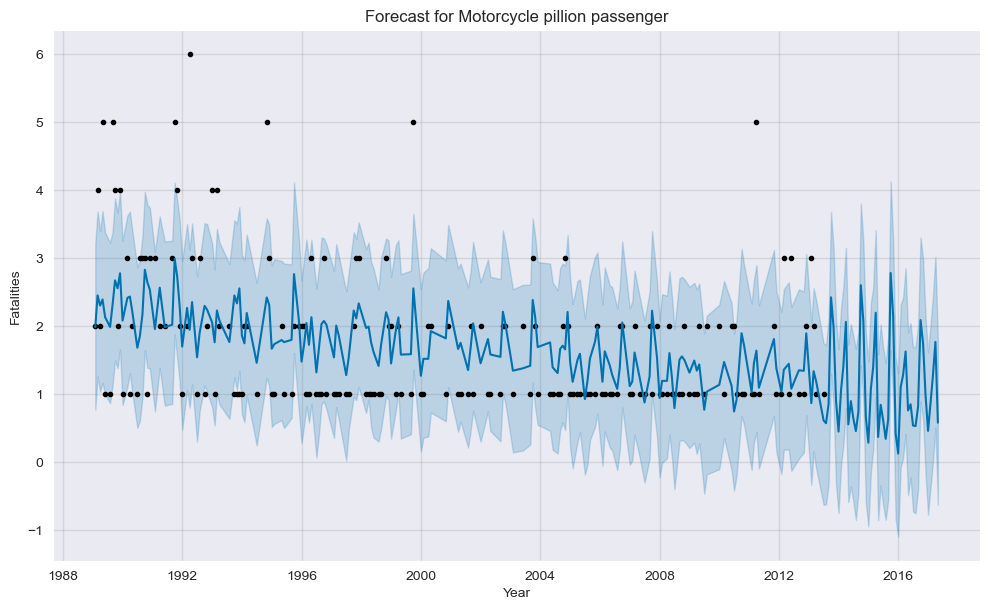

Motorcycle pillion passenger does not reach zero fatalities by 2050
RMSE for Motorcycle pillion passenger: 1.1136422603493794


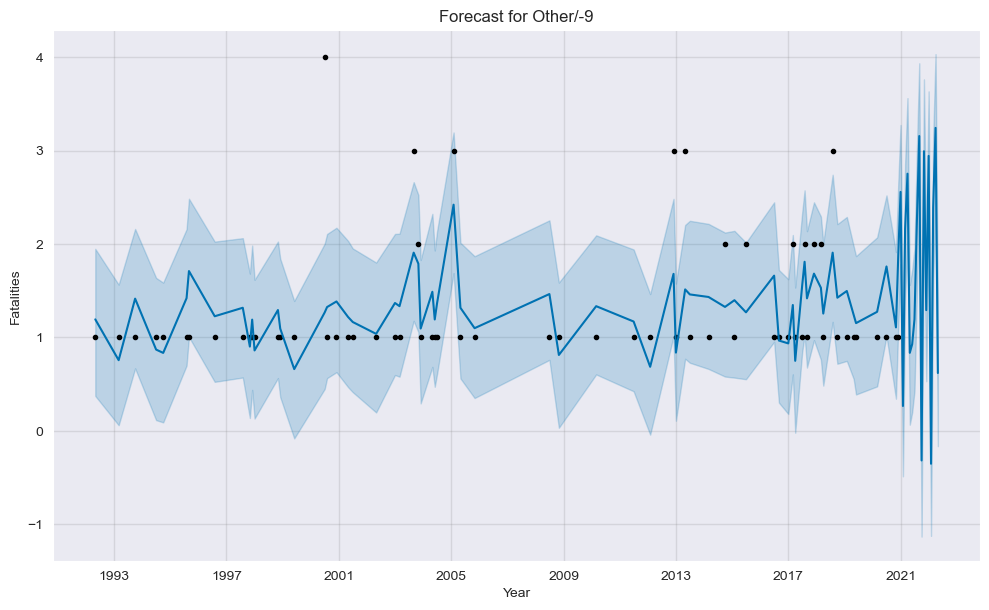

The forecasted date when fatalities might reach zero for Other/-9 is: 2021-09-30
RMSE for Other/-9: 1.489484901801758


In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# بارگذاری داده‌ها

# حذف Unspecified
data = data[data['Road User'] != 'Unspecified']

# تبدیل سال و ماه به یک ستون تاریخ
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1))

# گروه‌بندی بر اساس تاریخ و نوع کاربر جاده‌ای و محاسبه تعداد تلفات
monthly_fatalities = data.groupby(['Date', 'Road User']).size().reset_index(name='Fatalities')

# ایجاد دیکشنری برای ذخیره مدل‌ها، پیش‌بینی‌ها و ارزیابی‌ها
models = {}
forecasts = {}
evaluation_metrics = {}
road_users = monthly_fatalities['Road User'].unique()

for user in road_users:
    # آماده‌سازی داده‌ها برای Prophet
    df_user = monthly_fatalities[monthly_fatalities['Road User'] == user][['Date', 'Fatalities']].rename(columns={'Date': 'ds', 'Fatalities': 'y'})
    
    # تقسیم داده‌ها به بخش آموزش و تست (80% آموزش، 20% تست)
    train_size = int(len(df_user) * 0.8)
    train_df = df_user[:train_size]
    test_df = df_user[train_size:]
    
    # ایجاد و آموزش مدل
    model = Prophet()
    model.fit(train_df)
    
    # ایجاد یک دیتافریم برای تاریخ‌های آینده شامل بخش تست
    future = model.make_future_dataframe(periods=len(test_df), freq='M')
    
    # انجام پیش‌بینی
    forecast = model.predict(future)
    
    # ذخیره مدل و پیش‌بینی
    models[user] = model
    forecasts[user] = forecast
    
    # محاسبه معیار ارزیابی RMSE برای داده‌های تست
    test_forecast = forecast[-len(test_df):]  # گرفتن پیش‌بینی‌ها برای بخش تست
    rmse = np.sqrt(mean_squared_error(test_df['y'], test_forecast['yhat']))
    evaluation_metrics[user] = rmse

# نمایش نتایج پیش‌بینی و ارزیابی برای هر نوع کاربر جاده‌ای
for user in road_users:
    forecast = forecasts[user]
    model = models[user]
    
    # رسم نمودار پیش‌بینی
    model.plot(forecast)
    plt.title(f'Forecast for {user}')
    plt.xlabel('Year')
    plt.ylabel('Fatalities')
    plt.show()
    
    # پیدا کردن اولین تاریخ که پیش‌بینی تلفات صفر یا نزدیک به صفر است
    zero_fatality_date = forecast[forecast['yhat'] <= 0].head(1)['ds']
    if not zero_fatality_date.empty:
        print(f'The forecasted date when fatalities might reach zero for {user} is: {zero_fatality_date.iloc[0].date()}')
    else:
        print(f'{user} does not reach zero fatalities by 2050')
    
    # نمایش RMSE
    print(f'RMSE for {user}: {evaluation_metrics[user]}')


01:40:05 - cmdstanpy - INFO - Chain [1] start processing
01:40:05 - cmdstanpy - INFO - Chain [1] done processing


Evaluation for 0_to_16 - Year 2023:
MAE: 2.7615437482908347
MSE: 10.543859993503267
RMSE: 3.2471310403960087


<Figure size 1000x600 with 0 Axes>

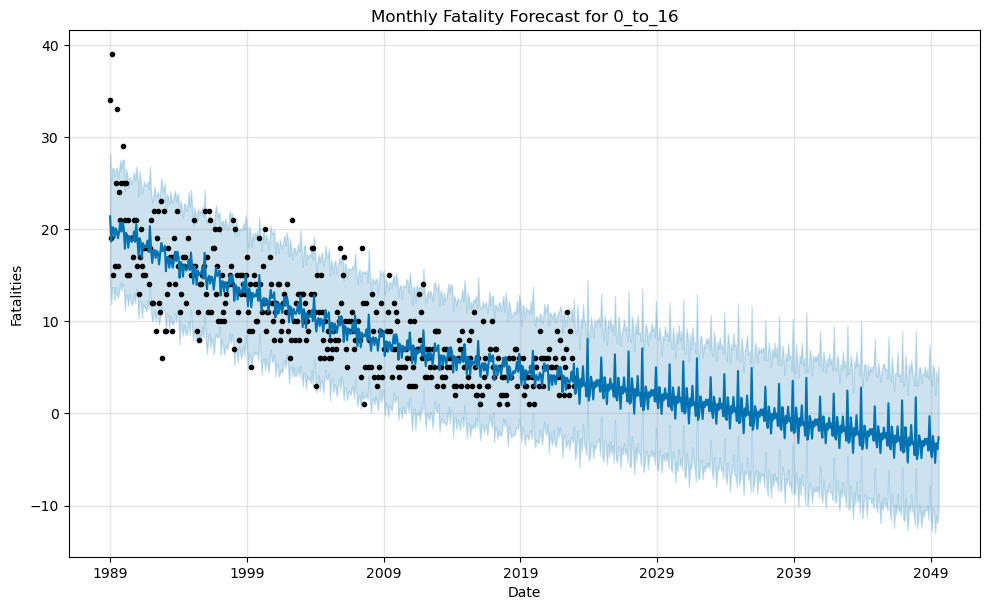

01:40:05 - cmdstanpy - INFO - Chain [1] start processing
01:40:06 - cmdstanpy - INFO - Chain [1] done processing


Evaluation for 17_to_25 - Year 2023:
MAE: 7.568355585140462
MSE: 75.90491232372545
RMSE: 8.712342527915524


<Figure size 1000x600 with 0 Axes>

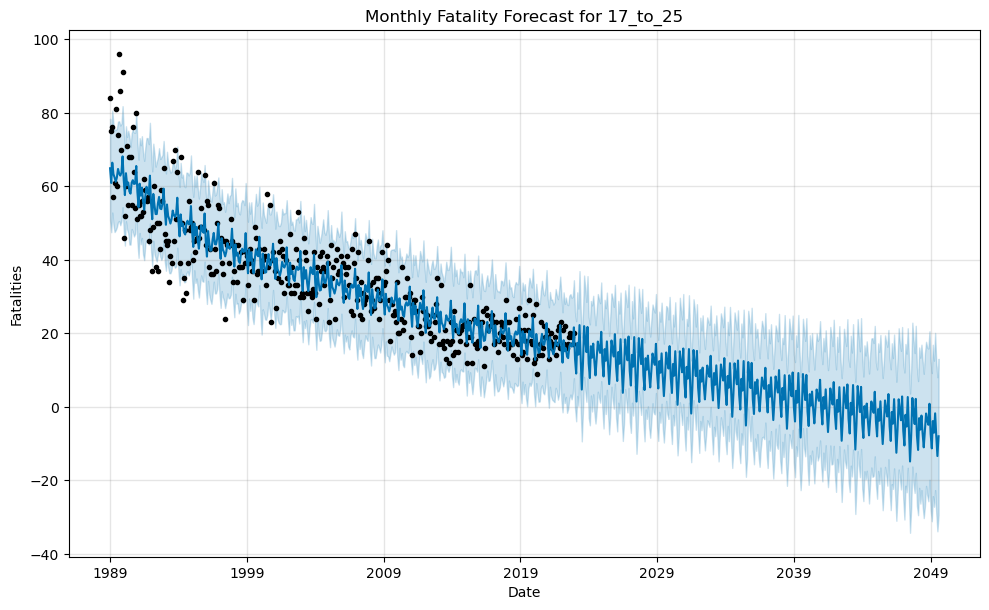

01:40:06 - cmdstanpy - INFO - Chain [1] start processing
01:40:06 - cmdstanpy - INFO - Chain [1] done processing


Evaluation for 26_to_39 - Year 2023:
MAE: 4.634589630426723
MSE: 31.718049183561522
RMSE: 5.631877944661223


<Figure size 1000x600 with 0 Axes>

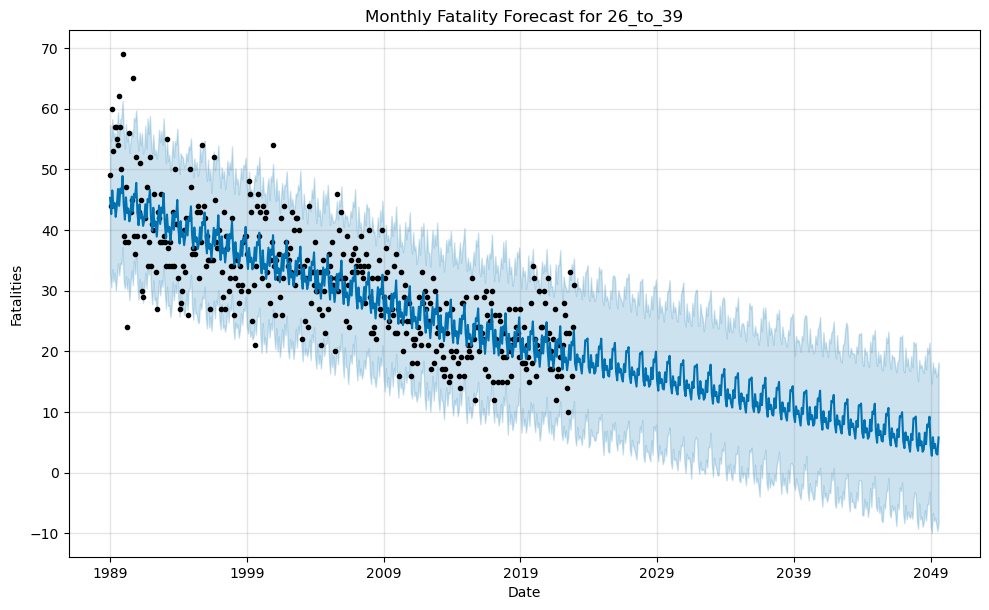

01:40:06 - cmdstanpy - INFO - Chain [1] start processing
01:40:06 - cmdstanpy - INFO - Chain [1] done processing


Evaluation for 40_to_64 - Year 2023:
MAE: 6.77339298355714
MSE: 58.740976990587875
RMSE: 7.6642662395423


<Figure size 1000x600 with 0 Axes>

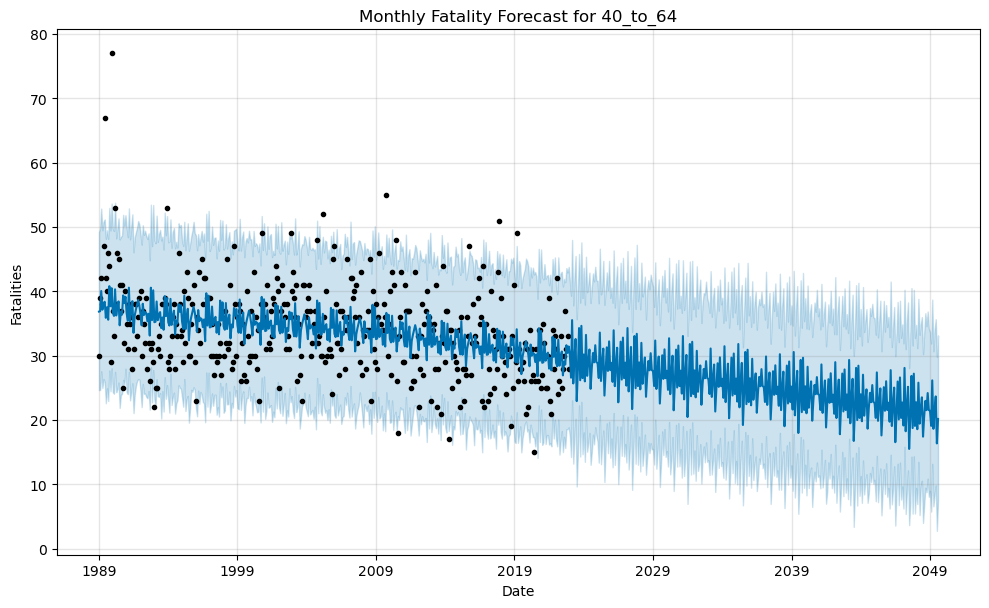

01:40:07 - cmdstanpy - INFO - Chain [1] start processing
01:40:07 - cmdstanpy - INFO - Chain [1] done processing


Evaluation for 65_to_74 - Year 2023:
MAE: 3.0650471777929558
MSE: 13.086488700149618
RMSE: 3.61752521762456


<Figure size 1000x600 with 0 Axes>

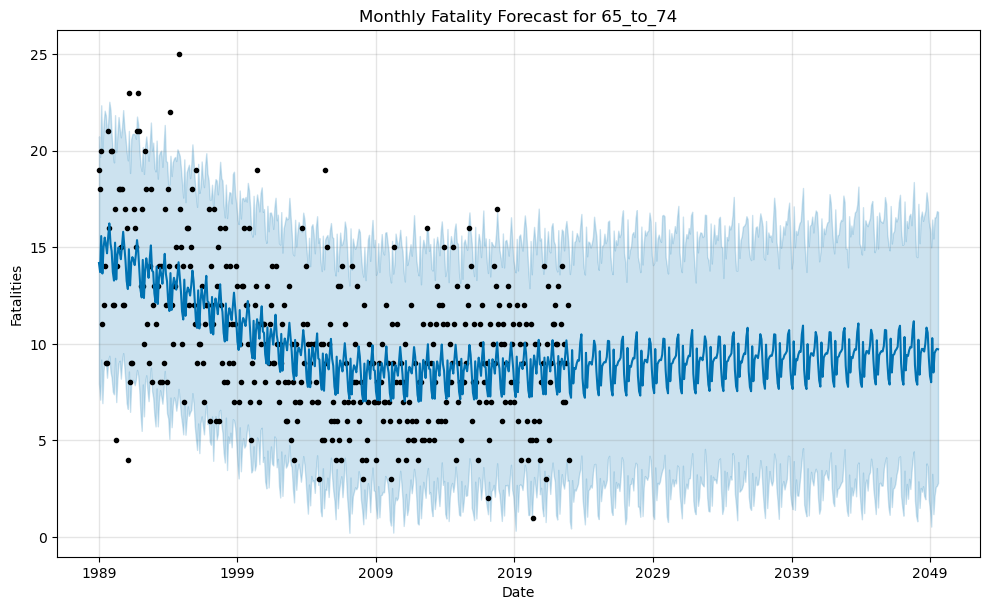

01:40:07 - cmdstanpy - INFO - Chain [1] start processing
01:40:07 - cmdstanpy - INFO - Chain [1] done processing


Evaluation for 75_or_older - Year 2023:
MAE: 2.476759418526892
MSE: 8.946233521059035
RMSE: 2.9910254965578336


<Figure size 1000x600 with 0 Axes>

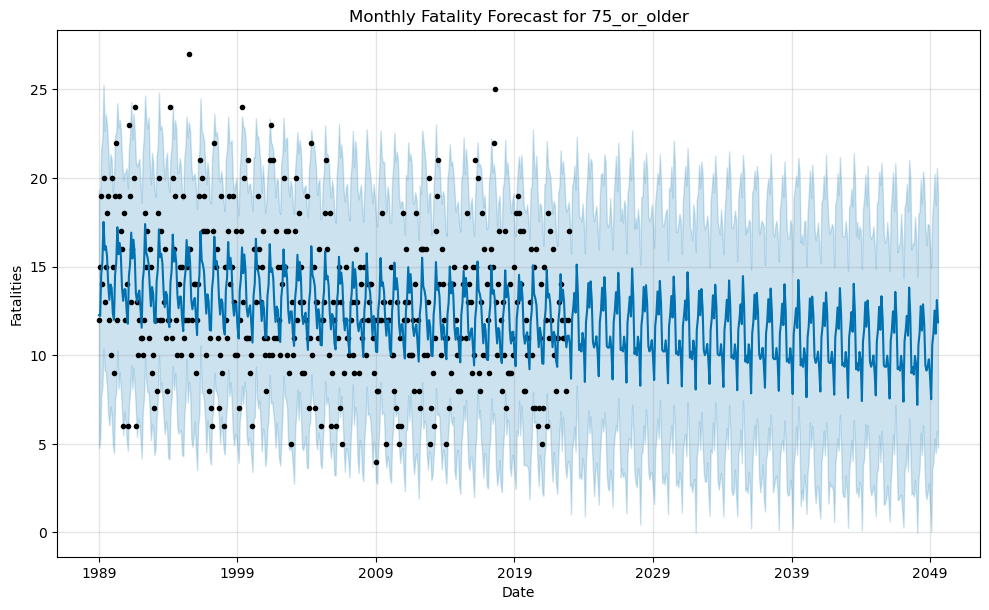

01:40:07 - cmdstanpy - INFO - Chain [1] start processing
01:40:07 - cmdstanpy - INFO - Chain [1] done processing


ValueError: Found input variables with inconsistent numbers of samples: [2, 12]

In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Age Group'] = data['Age Group'].astype(str)

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# تجمیع داده‌ها بر اساس تاریخ و گروه سنی
fatalities_by_age_month = data.groupby(['Date', 'Age Group']).size().reset_index(name='Fatalities')

# آماده‌سازی یک دیکشنری برای ذخیره پیش‌بینی‌ها
forecasts = {}

# لیست گروه‌های سنی در دیتاست
age_groups = fatalities_by_age_month['Age Group'].unique()

# افق پیش‌بینی (ماه‌ها)
latest_date = fatalities_by_age_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

# دوره آموزشی تا پایان سال 2022
train_end_date = '2022-12-31'

for age_group in age_groups:
    # آماده‌سازی داده‌ها برای Prophet
    age_data = fatalities_by_age_month[fatalities_by_age_month['Age Group'] == age_group][['Date', 'Fatalities']]
    age_data.columns = ['ds', 'y']
    
    # تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
    train_data = age_data[age_data['ds'] <= train_end_date]
    test_data = age_data[(age_data['ds'] > train_end_date) & (age_data['ds'] <= '2023-12-31')]

    # ایجاد و آموزش مدل Prophet
    model = Prophet(
        interval_width=0.95,
        yearly_seasonality=True,
        daily_seasonality=False,
        weekly_seasonality=False
    )
    model.fit(train_data)

    # ایجاد یک DataFrame برای نگهداری تاریخ‌های آینده
    future = model.make_future_dataframe(periods=forecast_horizon, freq='M')

    # انجام پیش‌بینی
    forecast = model.predict(future)

    # ذخیره پیش‌بینی در دیکشنری
    forecasts[age_group] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # ارزیابی مدل برای سال 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]
    test_data = test_data.set_index('ds')
    forecast_2023 = forecast_2023.set_index('ds')
    
    mae = mean_absolute_error(test_data['y'], forecast_2023['yhat'])
    mse = mean_squared_error(test_data['y'], forecast_2023['yhat'])
    rmse = mean_squared_error(test_data['y'], forecast_2023['yhat'], squared=False)
    
    print(f'Evaluation for {age_group} - Year 2023:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

    # رسم نمودار پیش‌بینی
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Monthly Fatality Forecast for {age_group}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    plt.show()
